In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Read the data file
rev = pd.read_csv("C:/Users/USER/Desktop/Course_Data_Scientist_Springboard/1Project_E-commerce/Womens Clothing E-Commerce Reviews.csv", index_col=0)

In [3]:
rev_new = pd.read_csv("Reviews_new.csv", index_col=0)

rev_new_T = pd.read_csv('Review_Title.csv', index_col=0)

### Correlations:
##### Correlation between age and positive feedback count.
I start to plot the correlation between age and positive feedback count received: there is no correlation!

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


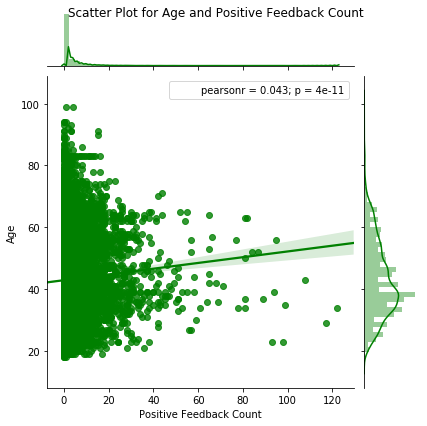

In [4]:
sns.jointplot(x='Positive Feedback Count', y='Age', data= rev, kind='reg', color='g')
plt.suptitle('Scatter Plot for Age and Positive Feedback Count')
plt.show()

### We calculate the count and mean group by Clothing ID of Rating, Recommended IND, Age and Positive Feedback Count. 

In [5]:
stat = (rev.groupby('Clothing ID')[["Rating","Recommended IND", "Age", "Positive Feedback Count"]].aggregate(['count','mean']))
stat.columns = ["Rating_Count","Rating_Mean","Recommended_Count", "Recommended_Mean","Age_Count","Age_Mean", "Positive_Feedback_count", "Positive_Feedback_mean"]

#### Correlation between Recommended Mean and Rating Mean group by Clothing ID.

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


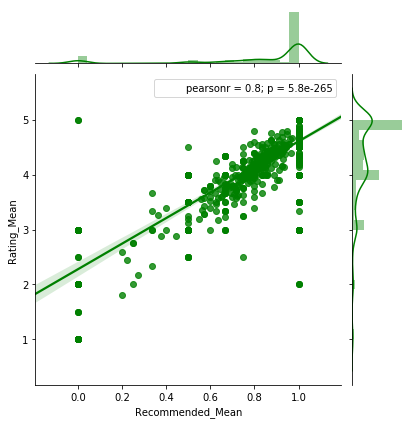

In [6]:
sns.jointplot(x="Recommended_Mean", y="Rating_Mean", data= stat, kind="reg", color="g")

There is a strong positive correlation of 0.8 between rating and recommended IND mean.

#### Correlation between Recommended Mean and Positive Feedback Mean group by Clothing ID.

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


correlation coefficient: -0.18400664349247886
p value = 1.2064578571161925e-10


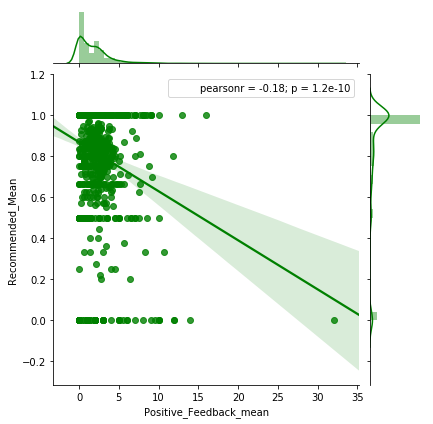

In [7]:
sns.jointplot(x="Positive_Feedback_mean", y="Recommended_Mean", data= stat, kind="reg", color="g")

cor_coeff, p_val = stats.pearsonr(stat["Recommended_Mean"], stat["Positive_Feedback_mean"])

print('correlation coefficient:',cor_coeff)
print('p value =',p_val)

Here, instead, it seems that there is a very slightly negative (-0.18) correlation between Positive Feedback mean and recommended mean.

#### Correlation between Positive Feedback Mean and Rating Mean group by Clothing ID.

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


correlation coefficient: -0.1867906390887257
p value = 6.248514221597484e-11


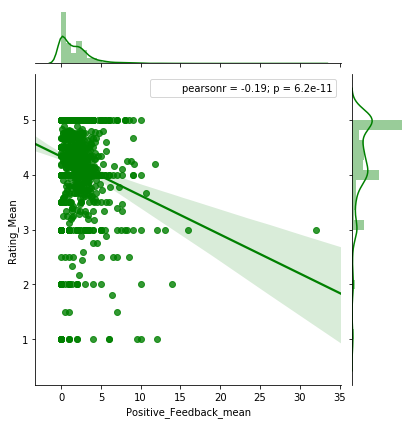

In [8]:
sns.jointplot(x="Positive_Feedback_mean", y="Rating_Mean", data= stat, kind="reg", color="g")

cor_coeff, p_val = stats.pearsonr(stat["Rating_Mean"], stat["Positive_Feedback_mean"])

print('correlation coefficient:',cor_coeff)
print('p value =',p_val)

As for recommended, also between rating and positive feedback mean the correlation coefficient is ~ -0.19.

#### Correlation Matrix.

This matrix investigates if there is trend between average rating and number of reviews by product.

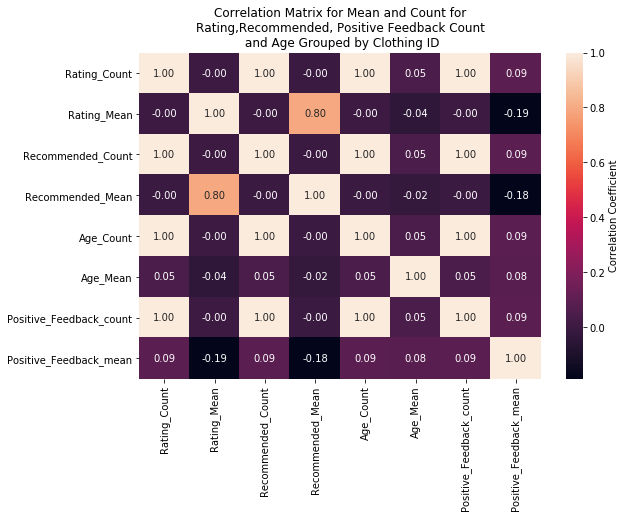

In [9]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(stat.corr(), annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix for Mean and Count for\nRating,Recommended, Positive Feedback Count\n and Age Grouped by Clothing ID")
plt.show()

From the heatmap, we can understand that there isn't correlation between count and average value. But, we can see also that there is a strong positive correlation of .80 between rating and recommended IND mean as the plot above shown.

In [10]:
stat.head()

,Rating_Count,Rating_Mean,Recommended_Count,Recommended_Mean,Age_Count,Age_Mean,Positive_Feedback_count,Positive_Feedback_mean
Clothing ID,,,,,,,,
0,1,5.0,1,1.000000,1,26.000000,1,0.000000
1,3,4.0,3,0.666667,3,36.666667,3,0.333333
2,1,4.0,1,1.000000,1,28.000000,1,0.000000
3,1,5.0,1,1.000000,1,36.000000,1,0.000000
4,1,5.0,1,1.000000,1,28.000000,1,0.000000


### Statistics with rev_new file

Now we use the dataframe created after the work done on 'Text Review'. 

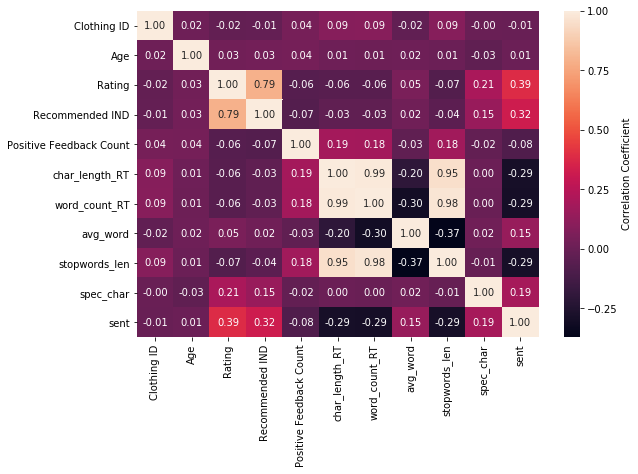

In [11]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(rev_new.corr(), annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})

plt.show()

From this correlation matrix, we can note that the polarity score ('sent') has a slightly correlation with Rating (0.39) and also with Recommended IND (0.32). Also, it seems to be a negative correlation (-0.29) between polarity score and word count.  

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


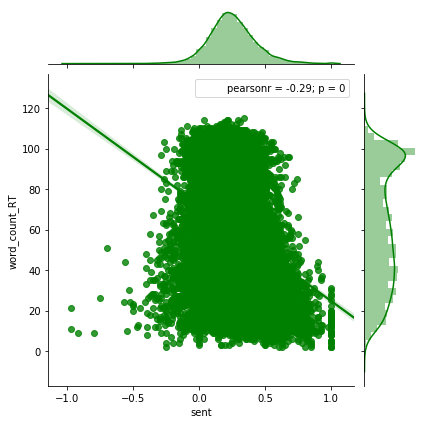

In [12]:
sns.jointplot(x="sent", y="word_count_RT", data= rev_new, kind="reg", color="g")

In [13]:
df = pd.get_dummies(rev_new['Sentiment'])
df.head()

,Negative,Neutral,Positive,Strong Negative,Strong Positive
0,0,0,0,0,1
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [14]:
df_tot = pd.merge(rev_new, df, left_index=True, right_index=True)
df_tot.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,...,stopwords_len,spec_char,RT_new,sent,Sentiment,Negative,Neutral,Positive,Strong Negative,Strong Positive
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,...,2,0,absolutely wonderful silky sexy comfortable,0.633333,Strong Positive,0,0,0,0,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,...,30,1,love dress sooo pretty happened store im glad ...,0.339583,Positive,0,0,1,0,0
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,...,45,1,high hopes dress really wanted work initially ...,0.073675,Neutral,0,1,0,0,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,...,6,2,love love love jumpsuit fun flirty fabulous ti...,0.550000,Positive,0,0,1,0,0
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,...,19,1,shirt flattering adjustable tie perfect length...,0.512891,Positive,0,0,1,0,0


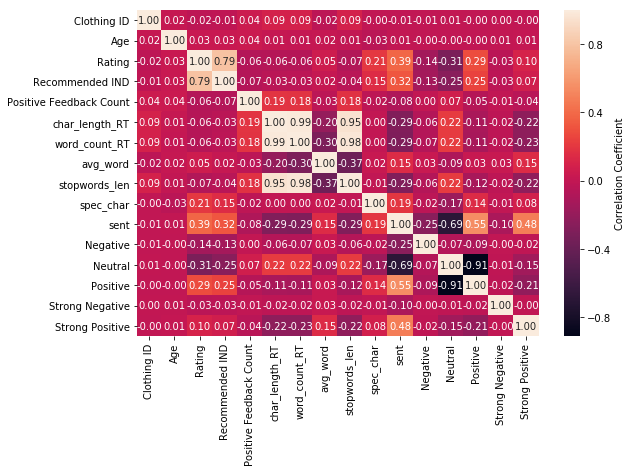

In [15]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(df_tot.corr(), annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})

plt.show()

### Statistics for Title

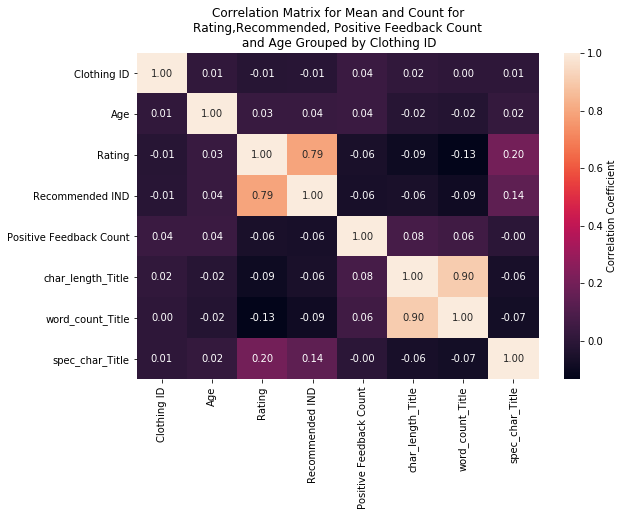

In [16]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(rev_new_T.corr(), annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix for Mean and Count for\nRating,Recommended, Positive Feedback Count\n and Age Grouped by Clothing ID")
plt.show()